# Millikan Oil Drop
___**Meansurement of the electron charge**

University of California, Santa Barbara, 93117 Goleta

Yuning Zhang---May.8th 2019

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os

In [245]:
rho=886 # kg/m^3
g=9.8 # m/s^2
b=8.20*10**(-3) # Pa*m
p=101204 #Pa
e=1.6*10**(-19)
V_std=1 #V

def get_eta(vid):
    # determine viscosity for each measurement
    vid=int(vid)
    eta= 1.8330*10**(-5) # N*s/m^2
    if 1<=vid<=5:
        return 1.8310*10**(-5)
    elif 6<=vid<=13:
        return 1.8340*10**(-5)
    else:
        return 1.8280*10**(-5)
    
    
def get_V(vid):
     # determine voltage for each measurement
    V=505 #V
    vid=int(vid)
    if 1<=vid<=5:
        return 504
    elif 6<=vid<=13:
        return 501
    else:
        return 505

In [246]:
d_array=10**(-3)*np.array([7.55,7.59,7.60,7.60,7.60,7.61]) # unit: m
d_mean=d_array.mean()
d_std=d_array.std()
print("d_mean: ",d_mean)
print("d_std: ",d_std)

d_mean:  0.00759166666667
d_std:  1.95078331845e-05


In [247]:
def reject_outliers(data, m=3):
    '''
    remove anomalous data points that outside 2 standard deviation in the array 
    '''
#     data=data[abs(data - np.mean(data)) < m * np.std(data)]
    return data[abs(data - np.mean(data)) < m * np.std(data)]

**Load data from files**

In [248]:
data_path = "./data/"
statistics=[]
for file_name in os.listdir(data_path):
    name=file_name[:3]
    obj_drop=pd.read_csv(data_path+file_name).dropna()
    # seperate rising and falling velocities, remove anomalous velocities at switching field direction
    v_y=obj_drop["v_{y}"].values
    n_points=len(v_y)
    v_r=reject_outliers(v_y[v_y>0])
    v_f=reject_outliers(v_y[v_y<0])
    # calculate mean and deviation
    (v_r_mean,v_r_std)=(v_r.mean(),v_r.std())
    (v_f_mean,v_f_std)=(np.abs(v_f.mean()),v_f.std())
    # calculate other properties
    vid=file_name[:2]
    eta=get_eta(vid)
    V=get_V(vid)
    a=np.sqrt((b/2/p)**2+9*eta*v_f_mean/2/rho/g)-b/(2*p) #droplet radius
    m=4*np.pi/3*a**3*rho # droplet mass
    q=m*g*d_mean*(v_f_mean+v_r_mean)/V/v_f_mean #droplet charge
    # long formula for error propagation
    q_std=q*np.sqrt((((b**2*g*rho+18*p**2*eta*v_f_mean+3*b*g*rho*p*np.sqrt(b**2/p**2+18*eta*v_f_mean/g/rho))/(2*v_f_mean*(b**2*g*rho+18*p**2*eta*v_f_mean))+1/(v_f_mean+v_r_mean))*v_f_std)**2+(1/(v_f_mean+v_r_mean)*v_r_std)**2+(1/d_mean*d_std)**2)
    # stack to dataframe
    statistics.append(np.array((name,n_points,v_r_mean,v_r_std,v_f_mean,v_f_std,a,m,q,q_std)))

Calculation of the attached charge

In [249]:
labels=["name","n_points","v_r_mean","v_r_std","v_f_mean","v_f_std","a","m","q","q_std"]
overall=pd.DataFrame(statistics,columns=labels,dtype="float32")

In [250]:
overall#he droplet charge calculated 

,name,n_points,v_r_mean,v_r_std,v_f_mean,v_f_std,a,m,q,q_std
0,01A,960.0,0.000097,0.000011,0.000066,0.000014,7.541285e-07,1.591690e-15,5.771566e-19,1.261804e-19
1,01B,1140.0,0.000054,0.000011,0.000079,0.000042,8.265568e-07,2.095755e-15,5.222924e-19,3.264994e-19
2,01C,835.0,0.000137,0.000017,0.000067,0.000013,7.569128e-07,1.609384e-15,7.241972e-19,1.445641e-19
3,01D,571.0,0.000044,0.000011,0.000049,0.000012,6.452343e-07,9.969526e-16,2.782697e-19,8.106526e-20
4,02A,1249.0,0.000083,0.000024,0.000037,0.000013,5.572819e-07,6.423136e-16,3.039631e-19,1.163181e-19
5,02B,704.0,0.000020,0.000011,0.000041,0.000019,5.825815e-07,7.338251e-16,1.607750e-19,9.995117e-20
6,04A,350.0,0.000062,0.000011,0.000064,0.000015,7.403968e-07,1.506316e-15,4.361534e-19,1.158103e-19
7,04B,154.0,0.000142,0.000083,0.000028,0.000037,4.748169e-07,3.972838e-16,3.573406e-19,4.076589e-19
8,04C,109.0,0.000039,0.000011,0.000051,0.000021,6.554863e-07,1.045233e-15,2.717123e-19,1.341717e-19
9,04D,48.0,0.000036,0.000012,0.000051,0.000009,6.539939e-07,1.038110e-15,2.628353e-19,6.389324e-20


the charge per oil droplet calculated from data is 

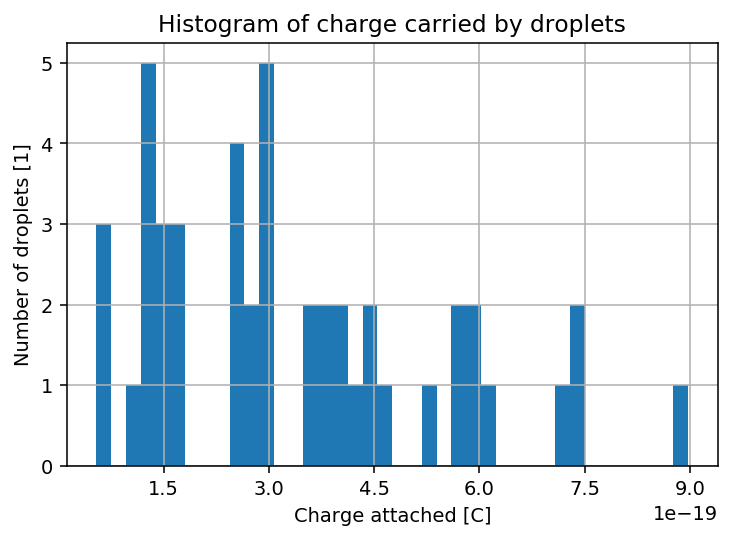

In [290]:
plt.figure().dpi=140
plt.xlabel("Charge attached [C]")
plt.ylabel("Number of droplets [1]")
plt.xticks(np.arange(0,9.5E-19,1.5E-19))
plt.title("Histogram of charge carried by droplets")
(overall.q).hist(bins=40)

In [252]:
def clustering(arr,x):
    '''
    Assume the charge is quantized, and the minimum quantum of charge is x.
    That means the charge can only be integral multiple of x, (x,2x,3x...)
    Thus we can divide the droplets into different clusters based on their attached charges
    
    group1=[droplets with charge between 0 and 1x]
    group2=[droplets with charge between 1x and 2x]
    
    return: list of cluters(numpy array)
    '''
    arr=list(arr/x)
    num=int(max(arr))
    clusters=[]
    for i in range(num+1):
        clusters.append(x*(np.array(list(filter(lambda x:i<x<=i+1 ,arr)))))
    return clusters

In [275]:
def obj_error(x):
    '''
    objective function used for optimization, compare the average difference between each
    group with charge e and penalize deviation from e
    a proper value of assumed basic charge e (x here) will minimize the obj_error function 
    
    optimize this function and we can get value of e
    
    '''
    clusters=clustering(overall.q,x)
    test=np.nan_to_num(np.array(list(map(np.mean,clusters))))
    estimate_delta_q=[]
    n_len=len(test)
    for i in range(1,n_len):
        for j in range(i):
            estimate_delta_q.append(abs(test[i]-test[j])/(i-j))
    return  (np.array(estimate_delta_q).mean()-x)**2
#sum((np.array(estimate_delta_q)-e)**2)
#

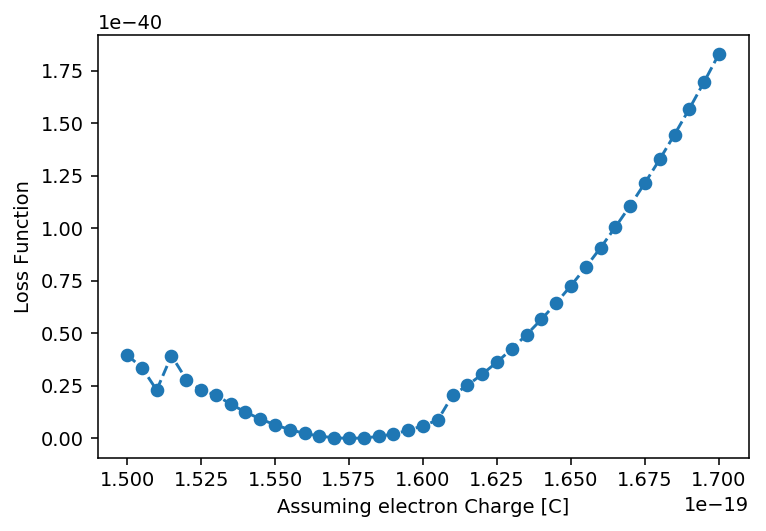

In [289]:
steps=0.005E-19
min_bound=1.5E-19
max_bound=1.7E-19
ran=np.arange(min_bound,max_bound,steps)
est=list(map(obj_error,ran))
plt.figure().dpi=140
plt.xlabel("Assuming electron Charge [C]")
plt.ylabel("Loss Function")
plt.plot(ran,est,"--o")

In [288]:
steps=0.001E-19
ran=np.arange(min_bound,max_bound,steps)
est=list(map(obj_error,ran))
# search for the minimized error and give
e_estimate,min_loss=min(list(zip(ran,est)),key=lambda x: x[1])

In [285]:
print("Estimate e value:",e_estimate,"C")
print("Error",(e-e_estimate)/e*100,"%")

Estimate e value: 1.575e-19 C
Error 1.5625 %
